In [34]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd



In [24]:

iris = load_iris()
iris_data = iris['data'] ##提取数据集中的特征
iris_target = iris['target'] ## 提取数据集中的标签
iris_names = iris['feature_names'] ### 提取特征名
scale = MinMaxScaler().fit(iris_data)## 训练规则
iris_dataScale = scale.transform(iris_data) ## 应用规则
kmeans = KMeans(n_clusters = 3, random_state=123).fit(iris_dataScale) ##构建并训练模型
print('构建的K-Means模型为：\n',kmeans)
result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])
print('聚类结果为：', kmeans.labels_)

构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)
花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0
聚类结果为： [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


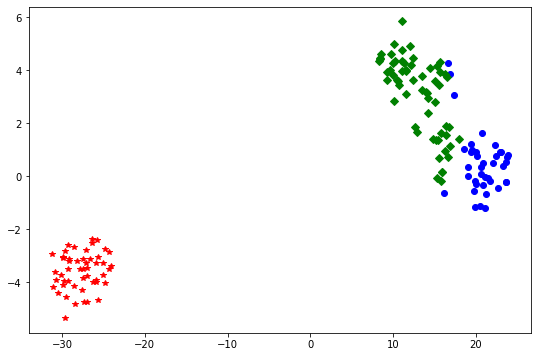

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
##使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2,init='random',
    random_state=177).fit(iris_data)
df=pd.DataFrame(tsne.embedding_) ##将原始数据转换为DataFrame
df['labels'] = kmeans.labels_ ##将聚类结果存储进df数据表
##提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2] 
## 绘制图形
fig = plt.figure(figsize=(9,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',
    df3[0],df3[1],'gD')
plt.show() ##显示图片

In [30]:
from sklearn.metrics import fowlkes_mallows_score

for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, random_state=123).fit(iris_data)
    score = fowlkes_mallows_score(iris_target, kmeans.labels_)
    print("iris data %s clusters FMI score %f"  % (i, score))

iris data 2 clusters FMI score 0.750473
iris data 3 clusters FMI score 0.820808
iris data 4 clusters FMI score 0.756593
iris data 5 clusters FMI score 0.725483
iris data 6 clusters FMI score 0.614345


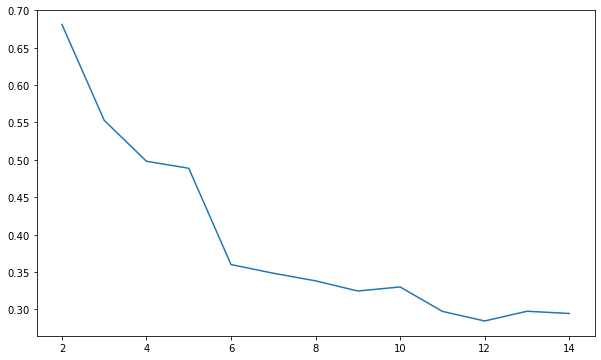

In [31]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,15):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = silhouette_score(iris_data,kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

In [32]:
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = calinski_harabaz_score(iris_data,kmeans.labels_)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(i,score))

iris数据聚2类calinski_harabaz指数为：513.924546
iris数据聚3类calinski_harabaz指数为：561.627757
iris数据聚4类calinski_harabaz指数为：530.765808
iris数据聚5类calinski_harabaz指数为：495.541488
iris数据聚6类calinski_harabaz指数为：469.836633
